# Pazy Wing Bending Results

Static bending results

It includes the following sets of results:

   * SHARPy results using UM derived model
   * UM/NAST results
   * Abaqus and MSC Nastran simulation (skin off)
   * Technion's MRM simulation results
   * Technion's experimental results (skin on)
   
The mass is applied at the wing tip at 50% of the chord.

The displacement results are about a reference line located along the mid-chord of the wing.

Version control:
  * SHARPy version: v1.2RC
  * Pazy wing model version: e5a9080f2fbf2b06e016ee7b7c9245ac2846efd8
  * Test script version: `ngoiz/pazy-sharpy/02_Bending/` d5cf2b861668c4f25af016dea6af5800c6727847

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
bending_results = {}

In [3]:
bending_results['sharpy_w_skin'] = {'file':'./bending_SHARPy_w_skin.txt',
                                    'skin': True,
                                    'marker': 'o',
                                    'ms': 6,
                                   'label':'SHARPy w/ skin'}
bending_results['sharpy_wo_skin'] = {'file':'./bending_SHARPy_wo_skin.txt',
                                     'skin': False,
                                     'marker': 'o',
                                     'ms': 6,
                                    'label': 'SHARPy w/o skin'}
bending_results['um_w_skin'] = {'file':'./bending_UMNAST_w_skin.txt',
                                    'skin': True,
                                    'marker': '^',
                                    'ms': 6,
                                   'label':'UM/NAST w/ skin'}
bending_results['um_wo_skin'] = {'file':'./bending_UMNAST_wo_skin.txt',
                                     'skin': False,
                                     'marker': '^',
                                     'ms': 6,
                                    'label': 'UM/NAST w/o skin'}
bending_results['technion_mrm_w_skin'] = {'file':'./bending_Technion_MRM_w_skin.txt',
                                          'skin': True,
                                          'marker': 'x',
                                          'ms': 6,
                                         'label': 'MRM w/skin'}
bending_results['technion_mrm_wo_skin'] = {'file':'./bending_Technion_MRM_wo_skin.txt',
                                           'marker': 'x',
                                           'ms': 6,
                                           'skin': False,
                                          'label': 'MRM w/o skin'}
bending_results['abaqus'] = {'file':'./bending_SHARPy_parentFEM_wo_skin.txt',
                             'skin': False,
                             'marker': 's',
                             'ms': 6,
                             'ls': 'none',
                            'label': 'Abaqus FEM'}
bending_results['nastran'] = {'file':'./bending_UMNAST_parentFEM_wo_skin.txt',
                             'skin': False,
                             'marker': 's',
                             'ms': 6,
                             'ls': 'none',
                            'label': 'MSC Nastran'}
bending_results['technion_experimental'] = {'file':'./bending_Technion_Experimental.txt',
                                            'skin': True,
                                           'label': 'Technion Experimental',
                                           'marker': 's',
                                            'ms': 6,
                                            'ls':'none'
                                           }

In [4]:
load_linear_limit = 1  #kg
for key, case in bending_results.items():
    case['data'] = np.loadtxt(case['file'])
    case['linear'] = stats.linregress(case['data'][case['data'][:, 0] < load_linear_limit, 0], case['data'][case['data'][:, 0] < load_linear_limit, 1])

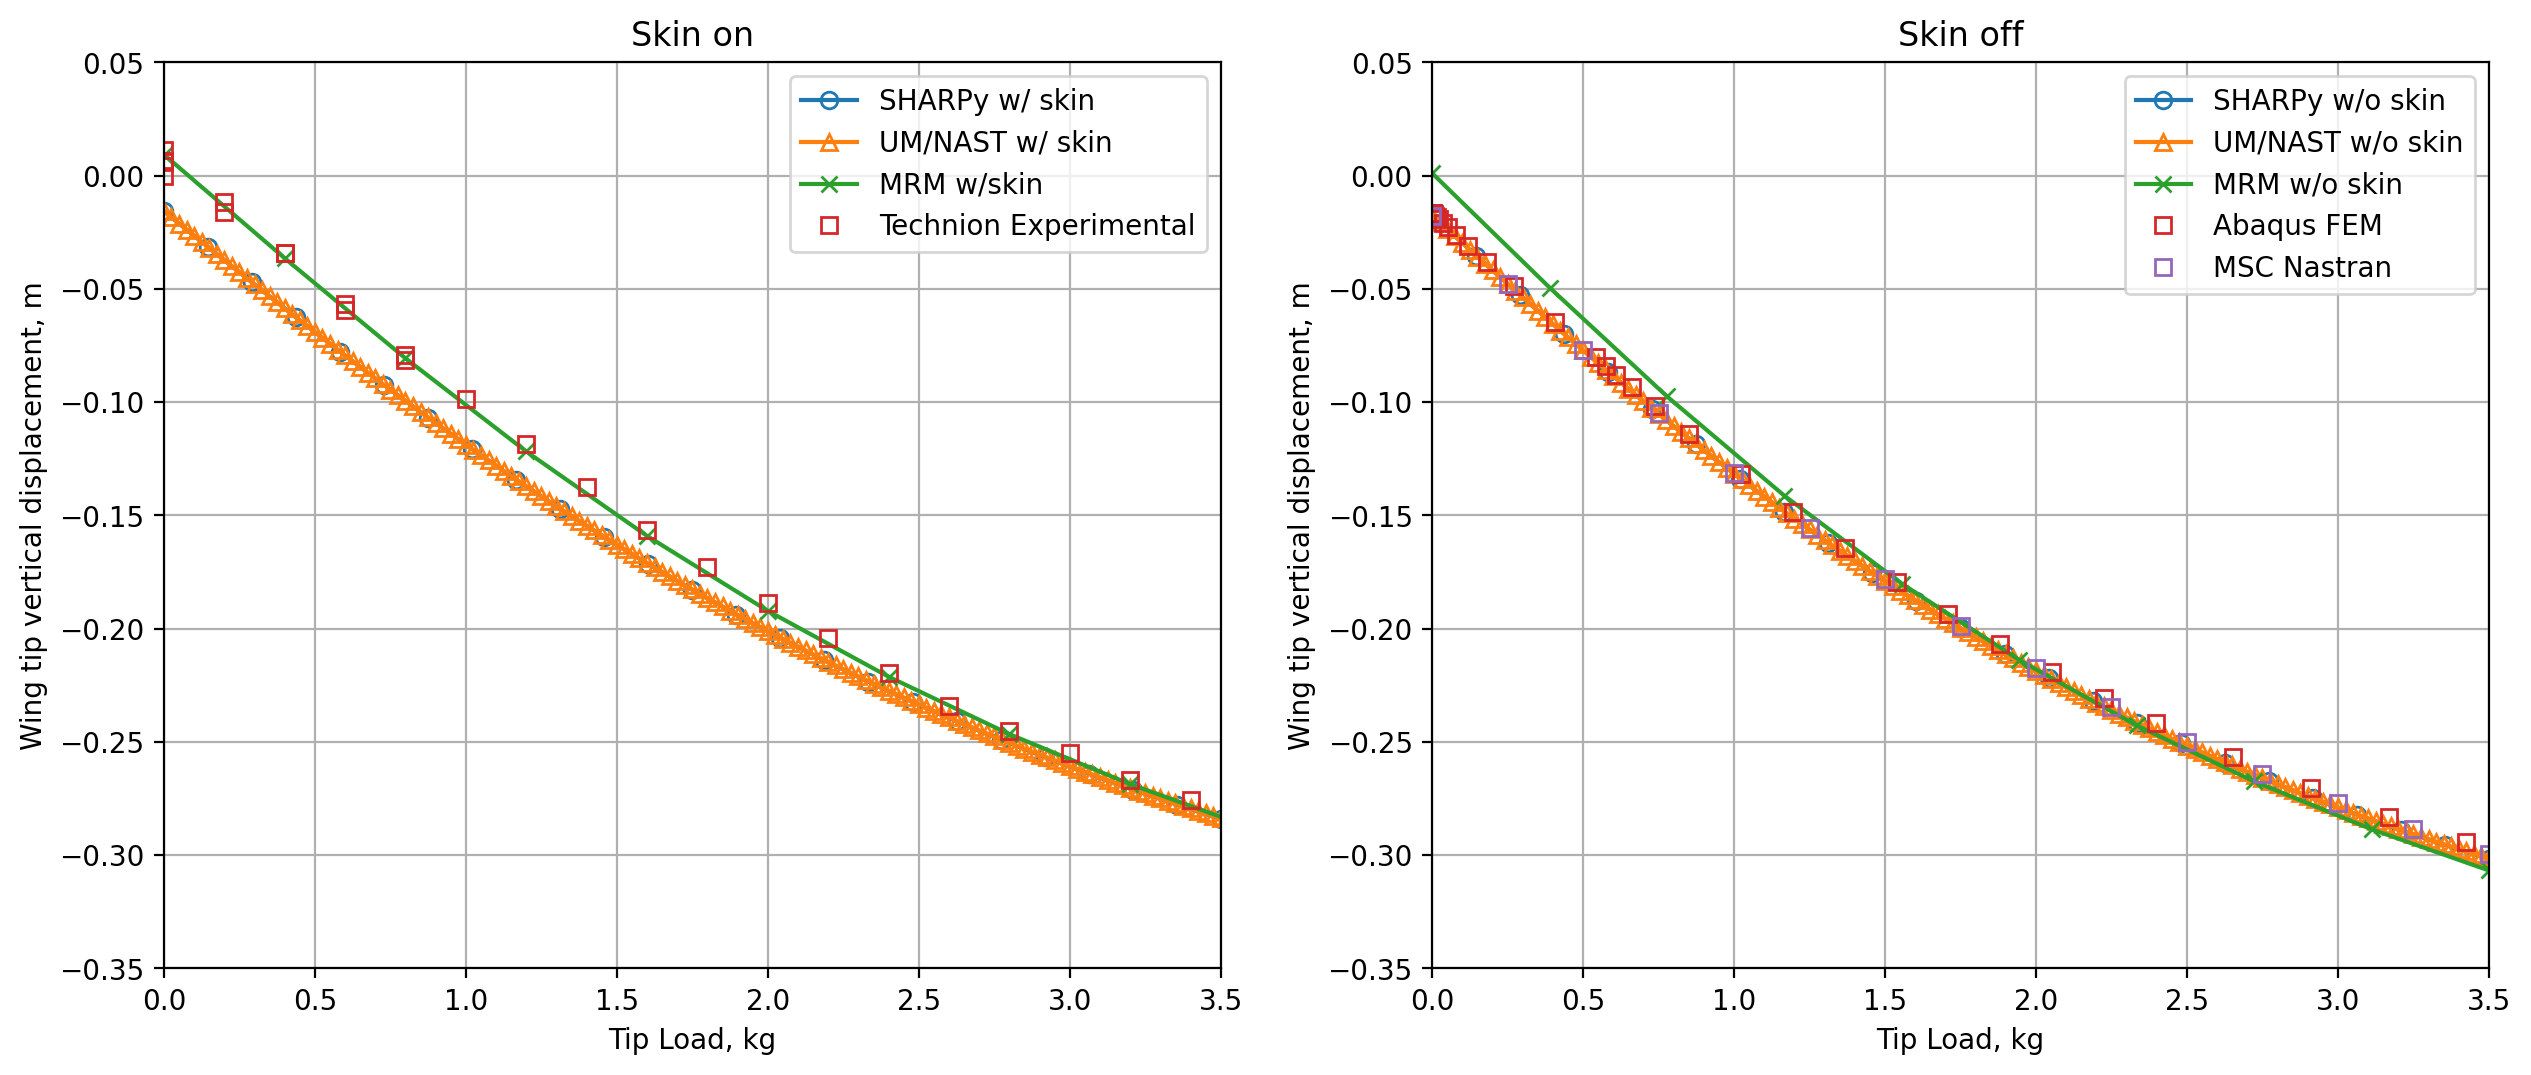

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

for case in bending_results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 1], label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))

for a in ax:
    a.legend()
    a.set_xlim(0, 3.5)
    a.set_ylim(-0.35, 0.05)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('Wing tip vertical displacement, m')
    a.grid()

ax[0].set_title('Skin on')
ax[1].set_title('Skin off');

In [6]:
print('Skin on')
for k, case in bending_results.items():
    if case['skin']:
        print('{:20s}\tslope = {:.4f} cm/kg'.format(k, case['linear'].slope * 100))
    
print('\nSkin off')
for k, case in bending_results.items():
    if not case['skin']:
        print('{:20s}\tslope = {:.4f} cm/kg'.format(k, case['linear'].slope * 100))

Skin on
sharpy_w_skin       	slope = -10.4365 cm/kg
um_w_skin           	slope = -10.3496 cm/kg
technion_mrm_w_skin 	slope = -11.2434 cm/kg
technion_experimental	slope = -10.7217 cm/kg

Skin off
sharpy_wo_skin      	slope = -11.5746 cm/kg
um_wo_skin          	slope = -11.4633 cm/kg
technion_mrm_wo_skin	slope = -12.6680 cm/kg
abaqus              	slope = -11.6125 cm/kg
nastran             	slope = -11.6464 cm/kg


## No offset at zero-load

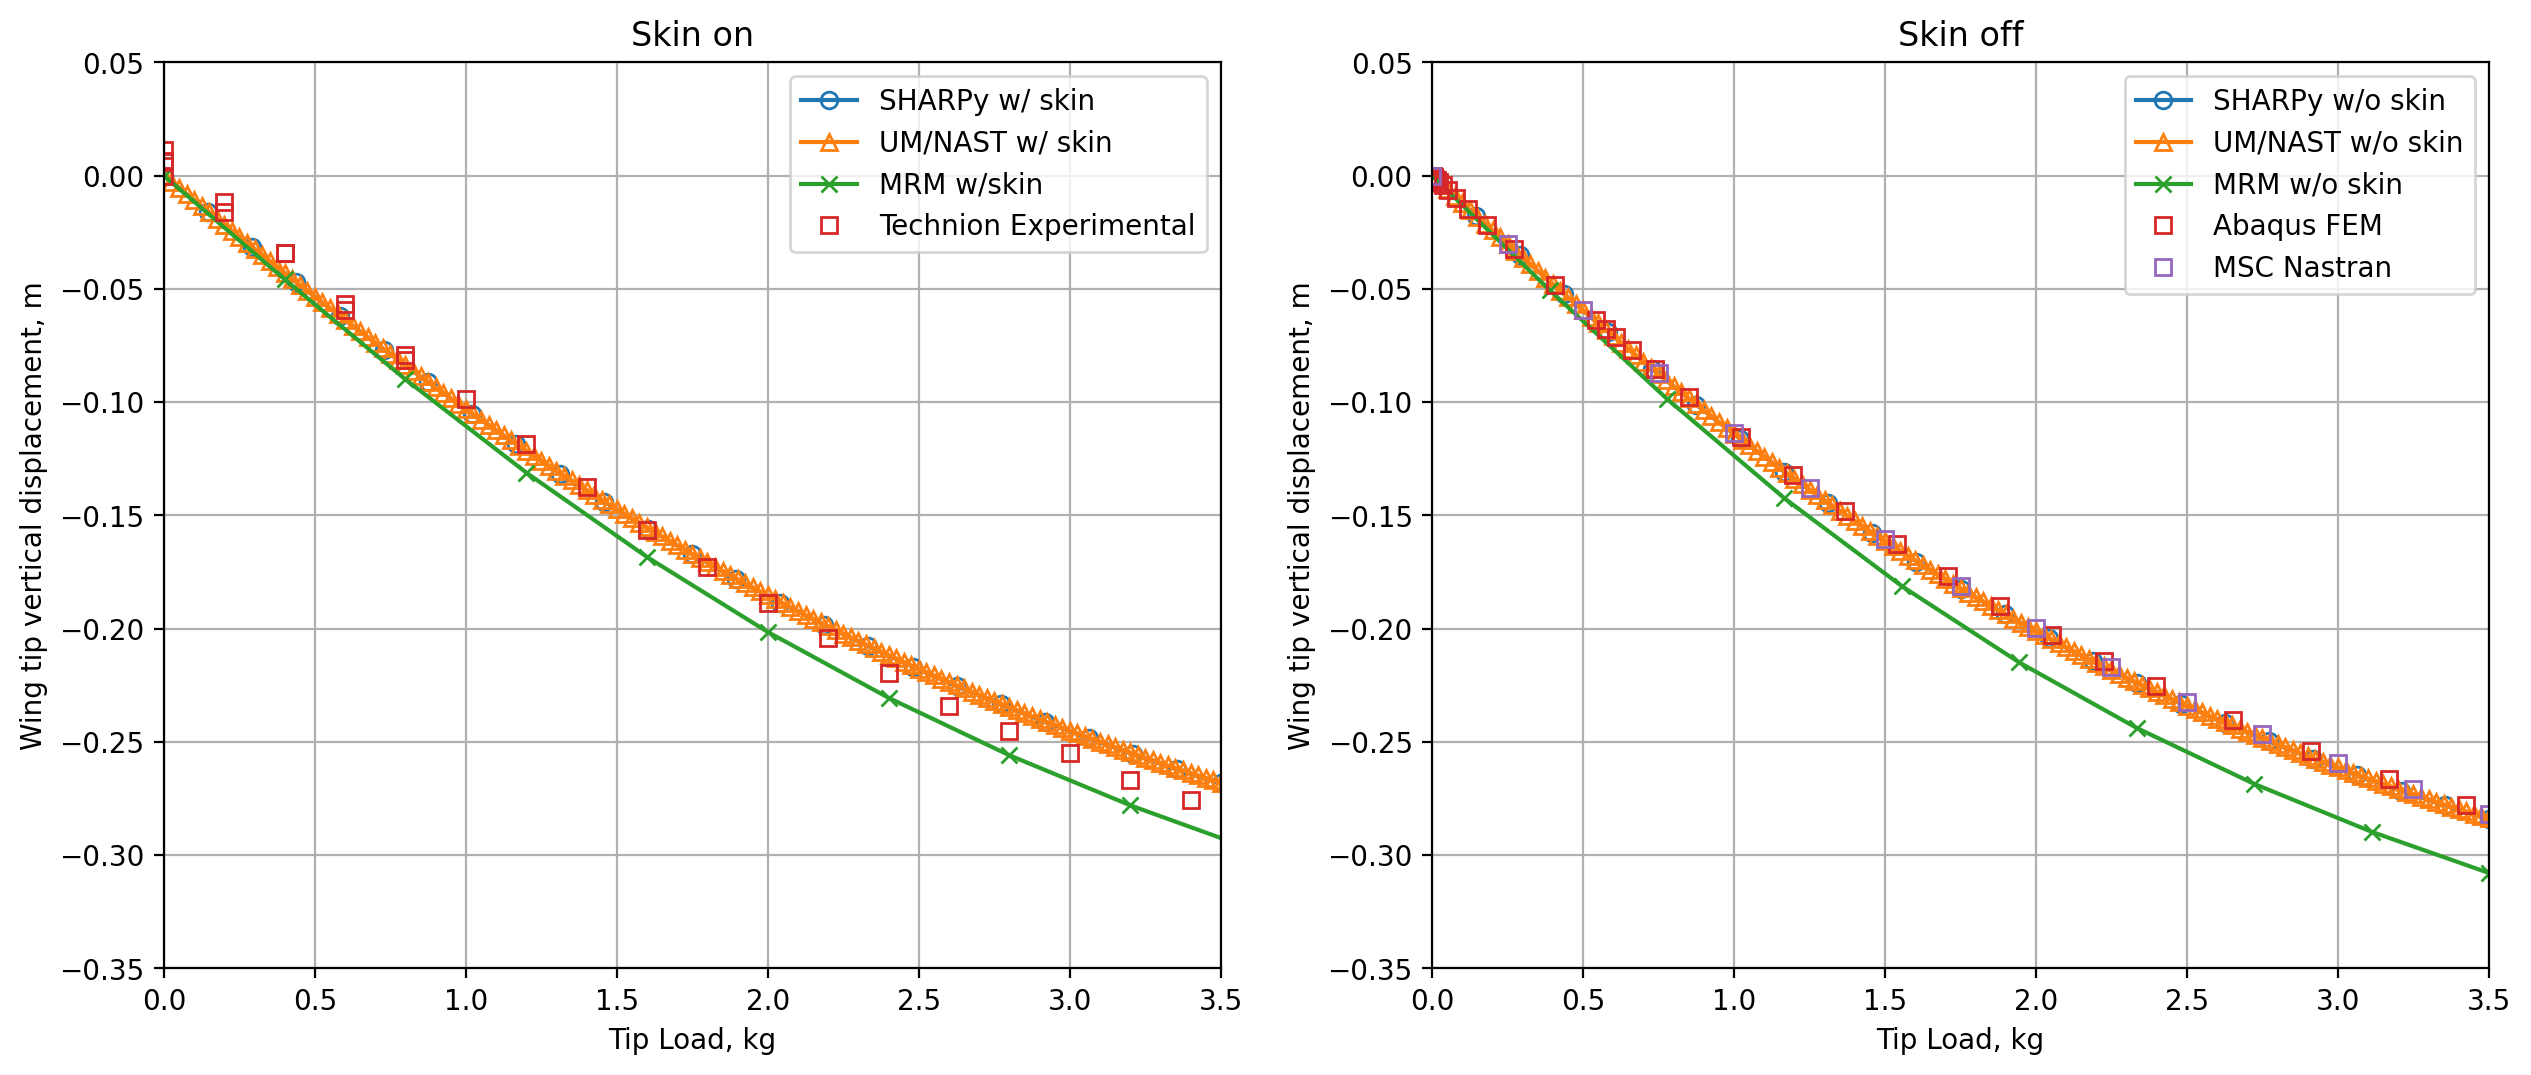

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

for case in bending_results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 1] - case['data'][0, 1], label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'))

for a in ax:
    a.legend()
    a.set_xlim(0, 3.5)
    a.set_ylim(-0.35, 0.05)
    a.set_xlabel('Tip Load, kg')
    a.set_ylabel('Wing tip vertical displacement, m')
    a.grid()

ax[0].set_title('Skin on')
ax[1].set_title('Skin off');